In [1]:
import pandas as pd
import numpy as np

**Data Preparation and Data Cleaning**

In [3]:
# Load the dataset
df = pd.read_csv('winequality-red.csv')

# Standarize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display initial information
print(f"Dataset size: {len(df)} rows")
df.head()

Dataset size: 1599 rows


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Check data types and structure
print("\nData Types and Missing Counts:")
df.info()


Data Types and Missing Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Define target variable
df_processed = df.copy()
df_processed['good_quality'] = (df['quality'] >= 7).astype(int)

# Drop the original 'quality' score column as it's directly related to the new target
df_processed = df_processed.drop(columns=['quality'])

df_processed.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,good_quality
1227,9.0,0.58,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.6,0
195,7.8,0.59,0.33,2.0,0.074,24.0,120.0,0.99680,3.25,0.54,9.4,0
1457,7.6,0.49,0.33,1.9,0.074,27.0,85.0,0.99706,3.41,0.58,9.0,0
969,6.7,0.56,0.09,2.9,0.079,7.0,22.0,0.99669,3.46,0.61,10.2,0
1045,6.9,0.44,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,0
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,0
551,9.4,0.43,0.24,2.8,0.092,14.0,45.0,0.99800,3.19,0.73,10.0,0
514,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,1
1598,6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,0
1416,10.0,0.32,0.59,2.2,0.077,3.0,15.0,0.99940,3.20,0.78,9.6,0


In [6]:
# Display the new target distribution briefly
print("\nBinary Target Distribution:")
print(df_processed['good_quality'].value_counts(normalize=True))


Binary Target Distribution:
good_quality
0    0.86429
1    0.13571
Name: proportion, dtype: float64


**Setting up the Validation Framework**

In [7]:
# Select relevant features and target
y = df_processed.good_quality
X = df_processed.drop(columns=['good_quality'])

In [8]:
from sklearn.model_selection import train_test_split

# First split train_temp (80%) and test (20%)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Then split train_temp into train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=1)

print(len(X_train), len(X_val), len(X_test))

959 320 320


**EDA and Feature Importance Analysis**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Identify all numerical features in the training set
numerical_features = X_train.columns

In [11]:
print("--- Ranges of Values and Descriptive Statistics ---")
# Check ranges (min/max), mean, std deviation, etc. [1]
print(X_train[numerical_features].describe().T)

--- Ranges of Values and Descriptive Statistics ---
                      count       mean        std      min      25%       50%  \
fixed_acidity         959.0   8.290615   1.782628  4.60000   7.1000   7.90000   
volatile_acidity      959.0   0.530652   0.181585  0.12000   0.4000   0.52000   
citric_acid           959.0   0.266736   0.197992  0.00000   0.0900   0.25000   
residual_sugar        959.0   2.547810   1.363112  0.90000   1.9000   2.20000   
chlorides             959.0   0.087197   0.047080  0.01200   0.0690   0.08000   
free_sulfur_dioxide   959.0  15.968196  10.721166  2.00000   7.0000  14.00000   
total_sulfur_dioxide  959.0  46.113660  32.368670  6.00000  22.0000  38.00000   
density               959.0   0.996716   0.001957  0.99007   0.9955   0.99672   
ph                    959.0   3.314619   0.158109  2.74000   3.2100   3.31000   
sulphates             959.0   0.657143   0.165672  0.33000   0.5500   0.62000   
alcohol               959.0  10.461940   1.107904  8.4000

In [12]:
print("--- Missing Value Analysis ---")
# Check for missing values [1]
missing_counts = X_train.isnull().sum()
missing_counts

--- Missing Value Analysis ---


,0
fixed_acidity,0
volatile_acidity,0
citric_acid,0
residual_sugar,0
chlorides,0
free_sulfur_dioxide,0
total_sulfur_dioxide,0
density,0
ph,0
sulphates,0


In [13]:
# Combine target and features for visualization
df_train = X_train.copy()
df_train['good_quality'] = y_train

print("--- Analysis of the Target Variable Distribution ---")

# Calculate the proportion of 'good_quality' wines (Target=1)
good_quality_rate = y_train.mean()
print(f"Overall Good Quality Rate: {good_quality_rate:.4f} ({good_quality_rate*100:.2f}%)")

--- Analysis of the Target Variable Distribution ---
Overall Good Quality Rate: 0.1522 (15.22%)


In [14]:
# Value Counts
quality_counts = y_train.value_counts()
print("\nTarget Class Counts:")
print(quality_counts)


Target Class Counts:
good_quality
0    813
1    146
Name: count, dtype: int64


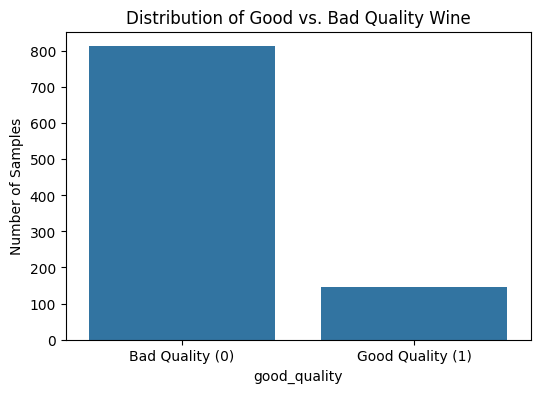

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribution of Good vs. Bad Quality Wine')
plt.xticks([0, 1], ['Bad Quality (0)', 'Good Quality (1)'])
plt.ylabel('Number of Samples')
plt.show()

In [16]:
print("--- Feature Importance: Correlation with Target ---")

# Calculate correlation of all features with the 'good_quality' target
# Sorting helps identify the most influential features
correlation_scores = df_train.corrwith(df_train['good_quality']).sort_values(ascending=False)

# Display scores, excluding the target variable itself
print(correlation_scores.drop(index=['good_quality']))

--- Feature Importance: Correlation with Target ---
alcohol                 0.418539
sulphates               0.219938
citric_acid             0.219375
fixed_acidity           0.102910
residual_sugar          0.033703
ph                     -0.052061
free_sulfur_dioxide    -0.074451
chlorides              -0.113729
total_sulfur_dioxide   -0.139116
density                -0.176519
volatile_acidity       -0.283315
dtype: float64


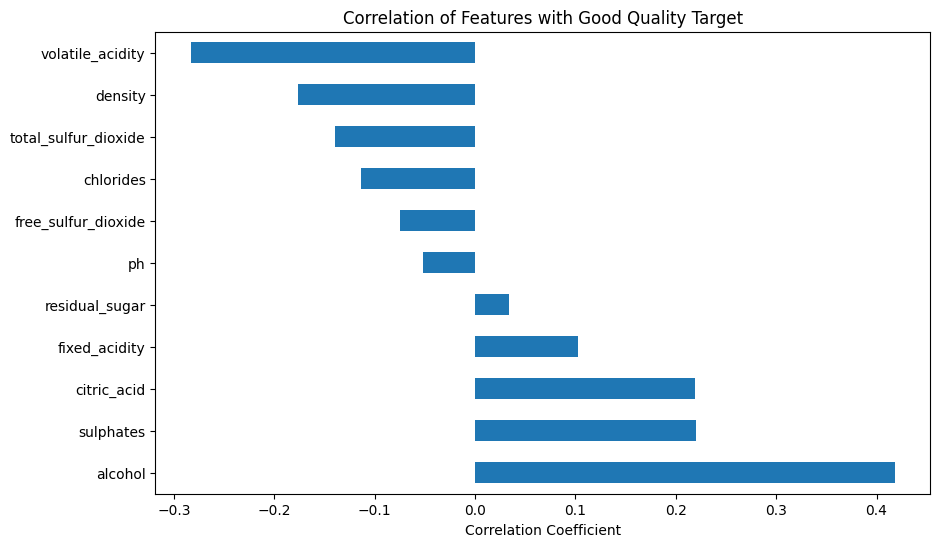

In [17]:
# Visualization:
plt.figure(figsize=(10, 6))
correlation_scores.drop(index=['good_quality']).plot(kind='barh')
plt.title('Correlation of Features with Good Quality Target')
plt.xlabel('Correlation Coefficient')
plt.show()

**We have an imbalanced problem**



**Model Selection Process and Parameter Tuning**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import mutual_info_classif

In [19]:
# Global variable for reproducibility
RANDOM_SEED = 42

print("Evaluation Metric Chosen: AUC-ROC.")
print("Rationale: Due to the high imbalance (Good Quality Rate ~15.2%), Accuracy is unreliable.")

Evaluation Metric Chosen: AUC-ROC.
Rationale: Due to the high imbalance (Good Quality Rate ~15.2%), Accuracy is unreliable.


In [20]:
# Establishing the Baseline Model (Logistic Regression)
# --- Model 1: Logistic Regression Baseline ---
print("--- Training Baseline Model: Logistic Regression ---")

# Train the model using default parameters
model_lr = LogisticRegression(solver='liblinear', random_state=RANDOM_SEED)
model_lr.fit(X_train, y_train)

--- Training Baseline Model: Logistic Regression ---


LogisticRegression(random_state=42, solver='liblinear')

In [21]:

# Predict probabilities on the Validation Set (needed for AUC-ROC)
y_val_pred_proba_lr = model_lr.predict_proba(X_val)[:, 1]

# Calculate AUC-ROC score
auc_lr = roc_auc_score(y_val, y_val_pred_proba_lr)

print(f"Logistic Regression Baseline AUC-ROC on Validation Set: {auc_lr:.4f}")

Logistic Regression Baseline AUC-ROC on Validation Set: 0.8967


In [22]:
# Initialize a dictionary/list to store scores for comparison
score_summary = {
    'Logistic Regression (Baseline)': auc_lr
}

In [23]:
# Training and Tuning Multiple Models (Decision Tree/Random Forest)
# --- Model 2: Tuning a Tree-Based Model (Random Forest) ---
print("--- Tuning Random Forest Classifier ---")

# Define a range of depths to test for hyperparameter tuning
depths = list(range(3, 11))
best_auc = 0
best_depth = 0

for depth in depths:
    # Train the Random Forest model
    model_rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=depth,
        random_state=RANDOM_SEED,
        n_jobs=-1
    )
    model_rf.fit(X_train, y_train)

    # Predict probabilities on the Validation Set
    y_val_pred_proba_rf = model_rf.predict_proba(X_val)[:, 1]

    # Calculate AUC-ROC score
    auc_rf = roc_auc_score(y_val, y_val_pred_proba_rf)

    # Check if this is the best model so far
    if auc_rf > best_auc:
        best_auc = auc_rf
        best_depth = depth

    print(f"  Depth {depth}: AUC-ROC = {auc_rf:.4f}")

print(f"Best Random Forest Model (Validation Set): Max Depth = {best_depth}, AUC-ROC = {best_auc:.4f}")
score_summary['Random Forest (Tuned)'] = best_auc

--- Tuning Random Forest Classifier ---
  Depth 3: AUC-ROC = 0.9082
  Depth 4: AUC-ROC = 0.9162
  Depth 5: AUC-ROC = 0.9233
  Depth 6: AUC-ROC = 0.9273
  Depth 7: AUC-ROC = 0.9358
  Depth 8: AUC-ROC = 0.9425
  Depth 9: AUC-ROC = 0.9424
  Depth 10: AUC-ROC = 0.9468
Best Random Forest Model (Validation Set): Max Depth = 10, AUC-ROC = 0.9468


In [24]:
# Evaluate on Validation Set
y_val_pred_proba_rf = model_rf.predict_proba(X_val)[:, 1]
auc_rf = roc_auc_score(y_val, y_val_pred_proba_rf)

print(f"RF (max_depth={depth}): AUC-ROC = {auc_rf:.4f}")

RF (max_depth=10): AUC-ROC = 0.9468


In [25]:
 # Track the best performing model (Model Selection Process)
if auc_rf > best_auc:
    best_auc = auc_rf
    best_depth = depth

print(f"Best Random Forest AUC-ROC: {best_auc:.4f} found at max_depth={best_depth}")

Best Random Forest AUC-ROC: 0.9468 found at max_depth=10


In [26]:
# Update score summary
score_summary['Random Forest (Tuned)'] = best_auc

In [27]:
# --- Model Selection Summary ---
print("--- Final Model Selection Summary (on Validation AUC-ROC) ---")

summary_df = pd.DataFrame(score_summary.items(), columns=['Model', 'AUC-ROC'])
summary_df = summary_df.sort_values(by='AUC-ROC', ascending=False)

print(summary_df)

--- Final Model Selection Summary (on Validation AUC-ROC) ---
                            Model   AUC-ROC
1           Random Forest (Tuned)  0.946802
0  Logistic Regression (Baseline)  0.896706


In [28]:
# Identify the Final Model
final_model_name = summary_df.iloc[0]['Model']
print(f"Selected Best Model: {final_model_name}")

Selected Best Model: Random Forest (Tuned)


In [29]:
# --- Final Model Evaluation on Test Set ---
print("--- Evaluating Final Model on Test Set ---")

# Instantiate the best Random Forest model with the optimal hyperparameters found during tuning
final_model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=best_depth, # Use the best_depth found from tuning
    random_state=RANDOM_SEED,
    n_jobs=-1
)

# Re-train the final model on the combined training data (X_train, y_train)
# In some scenarios, you might retrain on X_train_temp (train + val), but here we stick to X_train
final_model_rf.fit(X_train, y_train)

# Predict probabilities on the Test Set
y_test_pred_proba_rf = final_model_rf.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score on the Test Set
auc_test_rf = roc_auc_score(y_test, y_test_pred_proba_rf)

print(f"Final Random Forest Model AUC-ROC on Test Set: {auc_test_rf:.4f}")

# Update score summary with test set performance (optional, for completeness)
score_summary['Random Forest (Test Set)'] = auc_test_rf


--- Evaluating Final Model on Test Set ---
Final Random Forest Model AUC-ROC on Test Set: 0.8893


**Save the final mode**

In [30]:
import pickle
import os

In [31]:
# Define the file path for the model artifact
model_output_path = 'model.bin'

# 1. Save the final model (Random Forest)
with open(model_output_path, 'wb') as f_out:
    pickle.dump(final_model_rf, f_out)

print(f"Final model saved to {model_output_path}")

Final model saved to model.bin
